# <center>Sentiment Analysis on Harvard University Reviews</center>

** **
## <center>*02 - Sentiment Analysis Notebook*</center>

# Table of Contents

1. [Importing Data & Libraries](#1.-Importing-Data-&-Libraries)

    1.1 [Libraries](#1.1-Libraries)
    
    1.2 [Data](#1.2-Importing-Data)

## 1. Importing Data & Libraries

### 1.1 Libraries

In [38]:
import pandas as pd


# SentiWordNet
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Scaler
from sklearn.preprocessing import MinMaxScaler

# external py file
import functions_SA as f_sa

Checking the functions in the external file

In [ ]:
functions = [func for func in dir(f_sa) if callable(getattr(f_sa, func))]

# Print the list of functions
print("Functions in the external module:\n")
for func in functions:
    print(func+ '\n')

### 1.2 Data

In [4]:
data = pd.read_csv('/Users/antoniooliveira/Projects/Industrial Applications of AI/Assignment 4/clean_sample_data.csv')
data.head(3)

,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone,language,char_count,translated_text,clean_text
0,2015-03-04 20:15:25+00:00,Desktop,4,2,A nice walk,"This was an interesting place to walk around, ...",2,4,3,2015,UTC,en,142,"This was an interesting place to walk around, ...","This interesting place walk around, spread HUG..."
1,2015-08-05 23:38:34+00:00,Desktop,5,1,If you're in Cambridge you have to go to Harvard,It's everything you expect from Harvard. Ther...,2,5,8,2015,UTC,en,139,It's everything you expect from Harvard. Ther...,It's everything expect Harvard. There Harvard ...
2,2018-09-08 21:02:12+00:00,Mobile,3,0,Harvard visit was just ok,We went into this with higher expectations. We...,5,8,9,2018,UTC,en,154,We went into this with higher expectations. We...,We went higher expectations. We certainly visi...


## 2. Vader

In [7]:
data["vader_polarity_compound"] = data["clean_text"].apply(lambda review : vader_sa(str(review)))

data["vader_polarity_scores"] = data["clean_text"].apply(lambda review : vader_sa(str(review), compound = False))

**Grouping observations by Rating**

In [8]:
data.groupby('rating')['vader_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3,4.0,0.447275,0.326403,0.000,0.316125,0.52305,0.654200,0.7430
4,2.0,0.827350,0.188585,0.694,0.760675,0.82735,0.894025,0.9607
5,4.0,0.678125,0.453364,0.000,0.646875,0.88330,0.914550,0.9459


### 2.1 Visualisations

In [16]:
import matplotlib.pyplot as plt
def histogram(data):
    plt.hist(data, bins=22, color='indianred', ec='indianred', alpha=0.7, label='Data Points')  # Adjust the number of bins
    plt.title('Histogram')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

    # Set x-axis limits to include a larger range
    plt.xlim(min(data), max(data)) 

    plt.show()

--------------------------------------------------------------------------------
                               rating:  4


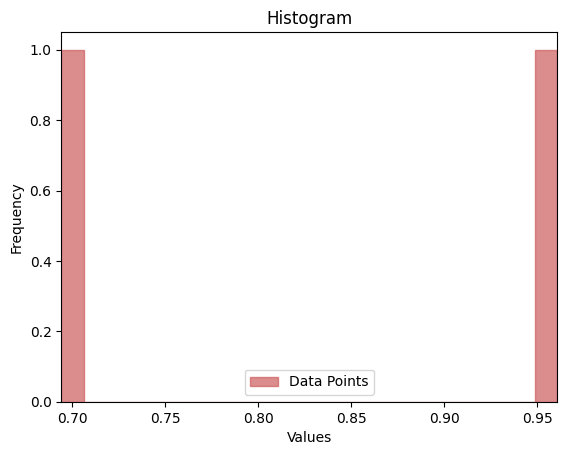


--------------------------------------------------------------------------------
                               rating:  5


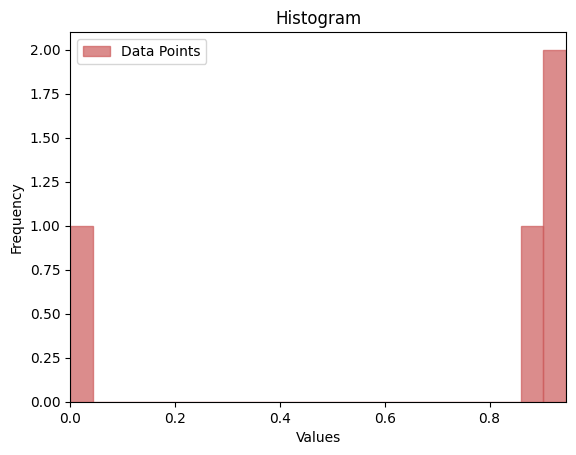


--------------------------------------------------------------------------------
                               rating:  3


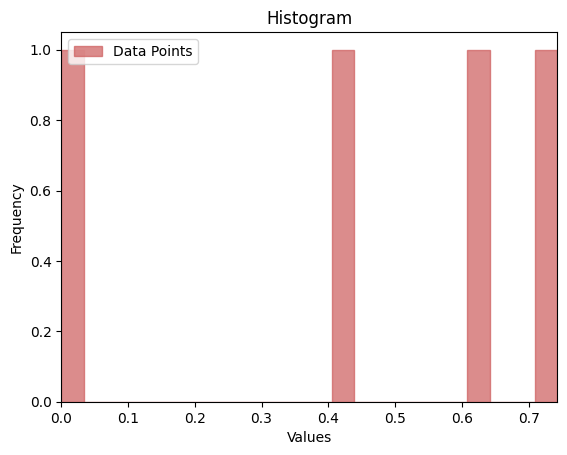

In [17]:
for rating in data['rating'].unique():
    print('--'*40)
    print(' '*30, f'rating:  {rating}')
    histogram(data[data['rating']== rating]['vader_polarity_compound'])
    print('')

## 3. TextBlob

In [20]:
data["textblob_polarity_compound"] = data["clean_text"].apply(lambda review : textblob_sa(str(review)))

**Grouping observations by Rating**

In [21]:
data.groupby('rating')['textblob_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3,4.0,0.227360,1.179825e-01,0.10,0.160651,0.215434,0.282143,0.378571
4,2.0,0.450000,5.551115e-17,0.45,0.450000,0.450000,0.450000,0.450000
5,4.0,0.165933,1.254988e-01,0.00,0.110000,0.186032,0.241964,0.291667


### 3.1 Visualisations

## 4. SentiWordNet

In [25]:
data['clean_sentiment'] = data['clean_text'].astype(str)
data['TokenizedColumn'] = data['clean_sentiment'].apply(lambda x: word_tokenize(x))

In [26]:
data['PosTagsColumn'] = data['TokenizedColumn'].apply(lambda x: pos_tag(x))

In [27]:
# Convert NLTK POS tags to WordNet POS tags
data['WordNet_PosTagsColumn'] = data['PosTagsColumn'].apply(
    lambda tags: [(word, nltk_to_wordnet_pos(pos)) for word, pos in tags if nltk_to_wordnet_pos(pos) is not None]
)

In [30]:
# Calculate sentiment scores and interpret the overall sentiment
data['SentiWordNet_polarity_compound'] = data['WordNet_PosTagsColumn'].apply(
    lambda pos_tags: sum(get_sentiment_score(word, pos) for word, pos in pos_tags)
)


# Display the resulting DataFrame
data[['clean_sentiment', 'SentiWordNet_polarity_compound']]

,clean_sentiment,SentiWordNet_polarity_compound
0,"This interesting place walk around, spread HUG...",0.375
1,It's everything expect Harvard. There Harvard ...,-0.125
2,We went higher expectations. We certainly visi...,1.375
3,"You know, one best universities world! I meek ...",0.375
4,The campus easily reached; subway stop Harvard...,3.750
5,"For, fact instruction around since 1636 gives ...",0.375
6,"It nice seen campus, expected saw TV",0.000
7,available academic tour historic tours booked....,1.000
8,The well-known timeless University great perso...,2.625
9,We decided visit Harvard University& glad. We ...,0.875


In [31]:
data.groupby('rating')['SentiWordNet_polarity_compound'].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3,4.0,0.68750,0.616610,0.000,0.28125,0.6875,1.09375,1.375
4,2.0,1.50000,1.590990,0.375,0.93750,1.5000,2.06250,2.625
5,4.0,1.21875,1.736181,-0.125,0.25000,0.6250,1.59375,3.750


### 4.1 Normalised SentiWordNet

In [ ]:
scaler = MinMaxScaler(feature_range = (-1,1))

SentiWordNet_normalized_polarity = scaler.fit_transform(data["SentiWordNet_polarity_compound"].to_numpy().reshape(-1, 1))

In [ ]:
data["SentiWordNet_normalized_polarity"] = SentiWordNet_normalized_polarity.reshape(-1)
data[['clean_sentiment', 'SentiWordNet_polarity_compound', 'SentiWordNet_normalized_polarity']].describe()


In [ ]:
data.groupby('rating')['SentiWordNet_normalized_polarity'].describe()

### 4.2 Visualisations

## 5. AFINN Lexicon

In [35]:
data['Afinn_polarity_compound'] = data['clean_sentiment'].apply(lambda x: 
                                              afinn.score(x))

In [37]:
data[['clean_sentiment', 'Afinn_polarity_compound']]

,clean_sentiment,Afinn_polarity_compound
0,"This interesting place walk around, spread HUG...",3.0
1,It's everything expect Harvard. There Harvard ...,0.0
2,We went higher expectations. We certainly visi...,3.0
3,"You know, one best universities world! I meek ...",6.0
4,The campus easily reached; subway stop Harvard...,10.0
5,"For, fact instruction around since 1636 gives ...",6.0
6,"It nice seen campus, expected saw TV",3.0
7,available academic tour historic tours booked....,1.0
8,The well-known timeless University great perso...,16.0
9,We decided visit Harvard University& glad. We ...,7.0


In [ ]:
data.groupby('rating')['Afinn_polarity_compound'].describe()

### 5.1 Normalised AFINN

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (-1,1))

afinn_normalized_polarity = scaler.fit_transform(data["Afinn_polarity_compound"].to_numpy().reshape(-1, 1))

In [ ]:
data["afinn_normalized_polarity"] = afinn_normalized_polarity.reshape(-1)
data[['clean_lyrics_sentiment', 'Afinn_polarity_compound', 'afinn_normalized_polarity']].describe()

In [ ]:
data.groupby('rating')['afinn_normalized_polarity'].describe()

### 5.2 Visualisations